In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/Housing_1.csv')
df.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [3]:
df.isna().sum()

Unnamed: 0          0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.shape

(545, 14)

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=2)

In [12]:
train_stats = train.describe()
train_stats = train_stats.drop(columns=['price'])
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,436.0,275.057339,158.321364,0.0,135.75,277.5,412.75,544.0
area,436.0,5122.701835,2137.520667,1650.0,3535.00,4600.0,6370.00,15600.0
bedrooms,436.0,2.977064,0.717227,1.0,3.00,3.0,3.00,6.0
bathrooms,436.0,1.286697,0.491685,1.0,1.00,1.0,2.00,3.0
stories,436.0,1.823394,0.880702,1.0,1.00,2.0,2.00,4.0
mainroad,436.0,0.855505,0.351995,0.0,1.00,1.0,1.00,1.0
guestroom,436.0,0.176606,0.381773,0.0,0.00,0.0,0.00,1.0
basement,436.0,0.360092,0.480578,0.0,0.00,0.0,1.00,1.0
hotwaterheating,436.0,0.038991,0.193795,0.0,0.00,0.0,0.00,1.0
airconditioning,436.0,0.314220,0.464738,0.0,0.00,0.0,1.00,1.0


In [13]:
def normalize(x):
  return (x - train_stats['mean']) / train_stats['std']

In [14]:
train_x = train.drop(columns=['price'])
test_x = test.drop(columns=['price'])

train_y = train['price']
test_y = test['price']

In [15]:
train_x = normalize(train_x)
test_x = normalize(test_x)

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (13, )),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [45]:
import keras
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2),
              loss = 'mean_squared_error',
              metrics = tf.keras.metrics.RootMeanSquaredError()
              )
h = model.fit(train_x, train_y, epochs = 100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 25894236192768.0000 - root_mean_squared_error: 5088638.0000
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 25888047497216.0000 - root_mean_squared_error: 5088030.0000
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 25863340949504.0000 - root_mean_squared_error: 5085601.5000
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 25793168146432.0000 - root_mean_squared_error: 5078697.5000
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 25630924079104.0000 - root_mean_squared_error: 5062699.5000
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 25326377762816.0000 - root_mean_squared_error: 5032532.0000
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 24820779581440.0000 - root_mean_squared_error: 4982045.5000
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - lo

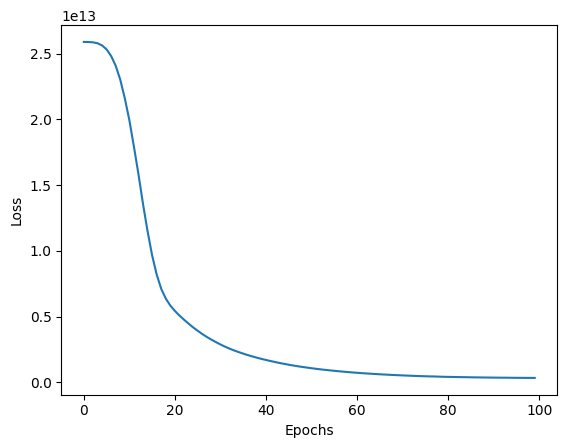

In [47]:
plt.plot(range(100), h.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()